<a href="https://colab.research.google.com/github/mohamedshouaib/iti/blob/main/Unsupervised_ML/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

In [8]:
def generate_data(n_samples=300, n_features=2, centers=4, cluster_std=1.0):
    """
    Generate synthetic data for clustering

    Parameters:
    -----------
    n_samples: int
        Number of data points to generate
    n_features: int
        Number of features (dimensions)
    centers: int
        Number of centers (true clusters)
    cluster_std: float
        Standard deviation of the clusters

    Returns:
    --------
    X: numpy.ndarray
        Generated data points of shape (n_samples, n_features)
    """
    X, _ = make_blobs(n_samples=n_samples,
                      n_features=n_features,
                      centers=centers,
                      cluster_std=cluster_std)
    return X

def plot_data(X, title="Data Points"):
    """
    Plot data points as a scatter plot

    Parameters:
    -----------
    X: numpy.ndarray
        Data points of shape (n_samples, 2)
    title: str
        Title of the plot
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True, alpha=0.3)
    plt.show()

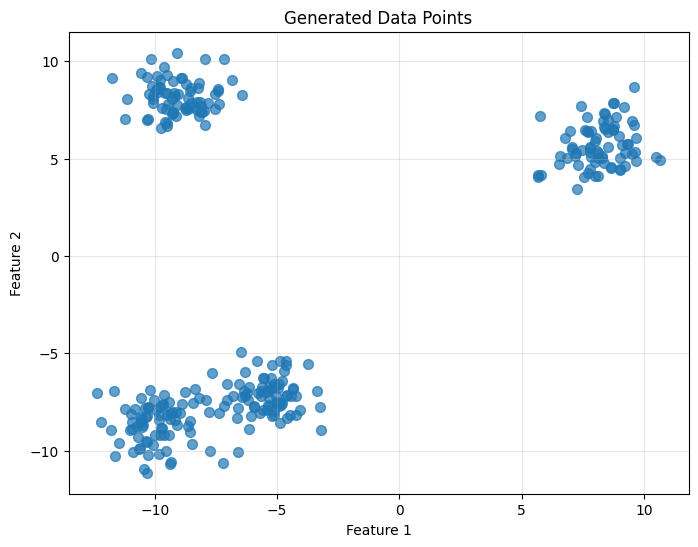

In [9]:
    # Generate synthetic data
    X = generate_data(n_samples=300, centers=4)

    # Plot raw data
    plot_data(X, title="Generated Data Points")

In [10]:
class KMeans:
    """
    K-means clustering algorithm implementation from scratch
    """
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        """
        Initialize KMeans object

        Parameters:
        -----------
        k: int
            Number of clusters
        max_iters: int
            Maximum number of iterations
        tol: float
            Tolerance for convergence
        """
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.clusters = None

    def _initialize_centroids(self, X):
        """
        Initialize centroids randomly from data points

        Parameters:
        -----------
        X: numpy.ndarray
            Data points of shape (n_samples, n_features)

        Returns:
        --------
        centroids: numpy.ndarray
            Initial centroids of shape (k, n_features)
        """
        # TODO: Implement centroids initialization
        # Choose k random points from X as initial centroids
        indices = np.random.choice(X.shape[0], self.k, replace=False)
        centroids = X[indices]
        return centroids

    def _assign_clusters(self, X, centroids):
        """
        Assign each data point to the nearest centroid

        Parameters:
        -----------
        X: numpy.ndarray
            Data points of shape (n_samples, n_features)
        centroids: numpy.ndarray
            Centroids of shape (k, n_features)

        Returns:
        --------
        clusters: numpy.ndarray
            Cluster assignments of shape (n_samples,)
        """
        # TODO: Implement cluster assignment
        # For each data point, calculate distance to each centroid
        # and assign it to the nearest centroid
        n_samples = X.shape[0]
        clusters = np.zeros(n_samples, dtype=int)

        # Your code here
        for i in range(n_samples):
            distances = np.linalg.norm(X[i] - centroids, axis=1)
            clusters[i] = np.argmin(distances)

        return clusters

    def _update_centroids(self, X, clusters):
        """
        Update centroids based on current cluster assignments

        Parameters:
        -----------
        X: numpy.ndarray
            Data points of shape (n_samples, n_features)
        clusters: numpy.ndarray
            Cluster assignments of shape (n_samples,)

        Returns:
        --------
        centroids: numpy.ndarray
            Updated centroids of shape (k, n_features)
        """
        # TODO: Implement centroid update
        # Calculate new centroids as the mean of all points in each cluster
        n_features = X.shape[1]
        centroids = np.zeros((self.k, n_features))

        # Your code here
        for i in range(self.k):
          points = X[clusters == i]
          if len(points) > 0:
            centroids[i] = np.mean(points, axis=0)

        return centroids

    def fit(self, X):
        """
        Fit K-means clustering model

        Parameters:
        -----------
        X: numpy.ndarray
            Data points of shape (n_samples, n_features)

        Returns:
        --------
        self: KMeans
            Fitted model
        """
        # TODO: Implement k-means algorithm
        # Initialize centroids
        # Repeat until convergence:
        #   1. Assign clusters

        # Initialize centroids
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            clusters = self._assign_clusters(X, self.centroids)

            new_centroids = self._update_centroids(X, clusters)

            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break

            self.centroids = new_centroids
            self.clusters = clusters


        return self


    def predict(self, X):
        """
        Predict cluster assignments for data points

        Parameters:
        -----------
        X: numpy.ndarray
            Data points of shape (n_samples, n_features)

        Returns:
        --------
        clusters: numpy.ndarray
            Cluster assignments of shape (n_samples,)
        """
        if self.centroids is None:
            raise Exception("Model not fitted yet")

        return self._assign_clusters(X, self.centroids)

def plot_clusters(X, clusters, centroids, title="K-means Clustering"):
    """
    Plot clusters and centroids

    Parameters:
    -----------
    X: numpy.ndarray
        Data points of shape (n_samples, 2)
    clusters: numpy.ndarray
        Cluster assignments of shape (n_samples,)
    centroids: numpy.ndarray
        Centroids of shape (k, 2)
    title: str
        Title of the plot
    """
    plt.figure(figsize=(10, 8))

    # Plot points with cluster colors
    k = len(np.unique(clusters))
    colors = plt.cm.tab10(np.linspace(0, 1, k))

    for i in range(k):
        plt.scatter(X[clusters == i, 0], X[clusters == i, 1],
                    s=50, alpha=0.7, color=colors[i], label=f'Cluster {i+1}')

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1],
                s=200, marker='X', color='black', label='Centroids')

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()






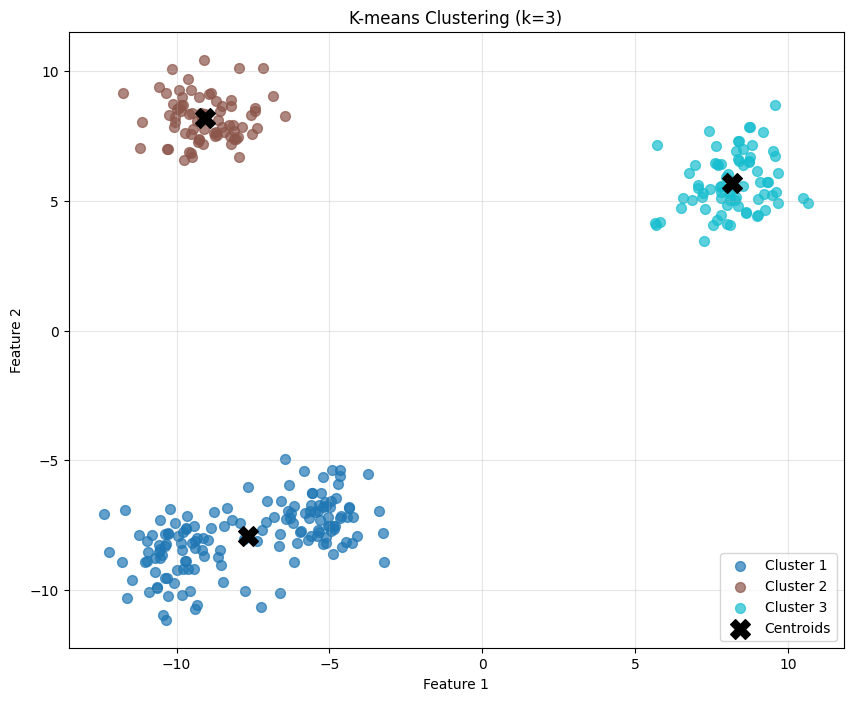

In [11]:
    # Create and fit KMeans model
    k = 3  # Number of clusters
    kmeans = KMeans(k=k)
    kmeans.fit(X)

    # Get cluster assignments and centroids
    clusters = kmeans.predict(X)
    centroids = kmeans.centroids

    # Plot clusters
    plot_clusters(X, clusters, centroids, title=f"K-means Clustering (k={k})")